## Devel notebook for dIFR surface stacking

In this notebook I am going to test how the code performs for dIFR surface stacking using real/synthetic data. Results will be compared with James Wookey's matlab code to make sure I am getting the same results.

Here I will also experiment with adding backazimuthal stacking and bootstrapping to generate uncertainties. First lets check the synthetic generation, after we have made sure we can import the code!!from pathlib import Path
import sys

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os
import sys
path_root = Path(os.getcwd()).parents[0]
sys.path.append(str(path_root))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
import ani_attenuation.synthetics as synthetics
import ani_attenuation.measurement as measurement
import ani_attenuation.waveform_tools as waveform_tools

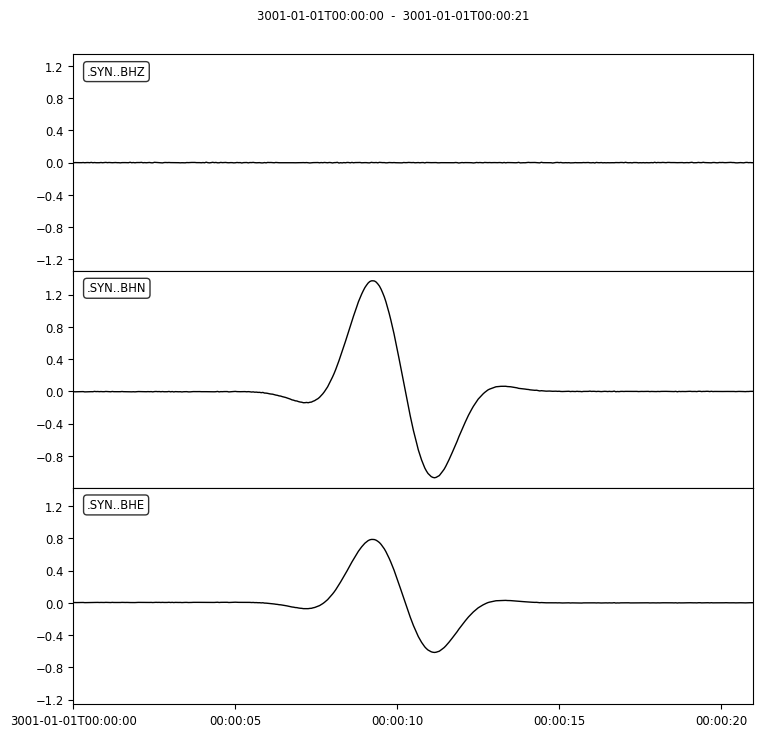

In [75]:
st = synthetics.gen_synthetic_split(30, 1, dtstar=2, spol=45, dfreq=0.2, delta=0.05, noise=0.001)
for tr in st:
    tr.stats.sac['a']  = -10
    tr.stats.sac['f'] = 11
st_wind = measurement.window_traces(st)
st_wind.plot()
plt.show()


Lets try a grid search of this synthetic

In [76]:
difrs = measurement.dtstar_gridsearch(st, nfast=181, ndts=161, fref=1)

In [83]:
difrs.min()

6.199066736668757e-05

Text(0, 0.5, 'Fast direction')

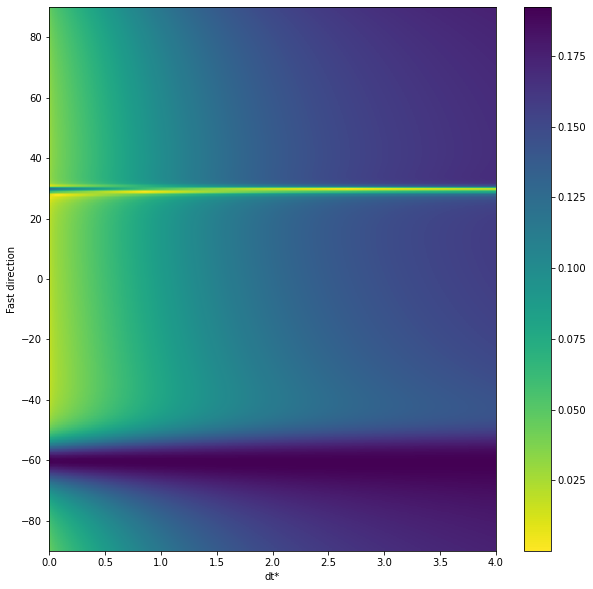

In [81]:
fig, ax = plt.subplots(1,figsize=(10,10))
C = ax.imshow(np.flipud(difrs), extent=[0,4,-90,90], aspect='auto',  cmap='viridis_r')
fig.colorbar(C)
ax.set_xlabel('dt*')
ax.set_ylabel('Fast direction')

Plot synthetic in Fast-Slow space

Text(0.5, 0, 'Time [s]')

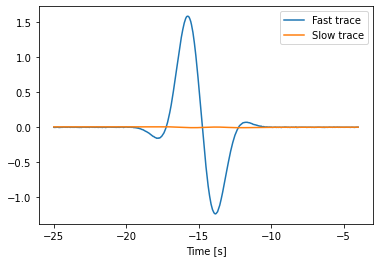

In [79]:
trF, trS = waveform_tools.rotate_traces(st_wind.select(channel='BHN')[0],
                                        st_wind.select(channel='BHE')[0] , 30)
fig, ax = plt.subplots(1)
t = trF.times() + trF.stats.sac['b']
ax.plot(t, trF.data, label='Fast trace')
ax.plot(t, trS.data, label='Slow trace')
ax.legend()
ax.set_xlabel('Time [s]')

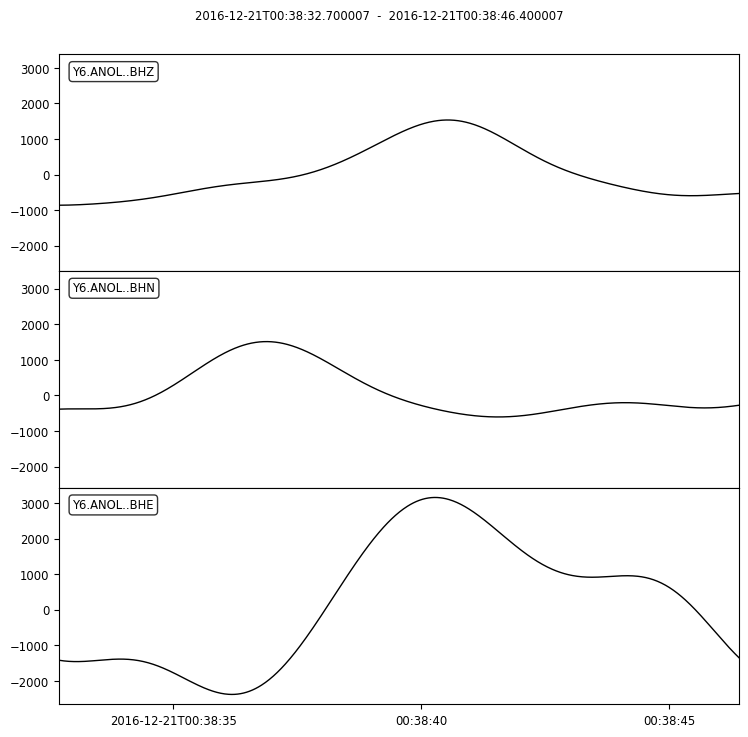

In [68]:
st = obspy.read('/Users/ja17375/Projects/DeepMelt/Ethiopia/data/ANOL/run/ANOL_2016356_0024.BH?')
st_wind = measurement.window_traces(st)
difrs = measurement.dtstar_gridsearch(st, nfast=181, ndts=161, fref=1)
st_wind.plot()
pass

Text(0, 0.5, 'Fast direction')

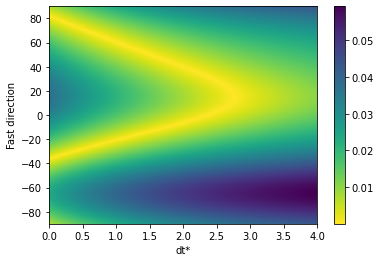

In [67]:
fig, ax = plt.subplots(1)
C = ax.imshow(difrs, extent=[0,4,-90,90], aspect='auto', cmap='viridis_r')
fig.colorbar(C)
ax.set_xlabel('dt*')
ax.set_ylabel('Fast direction')

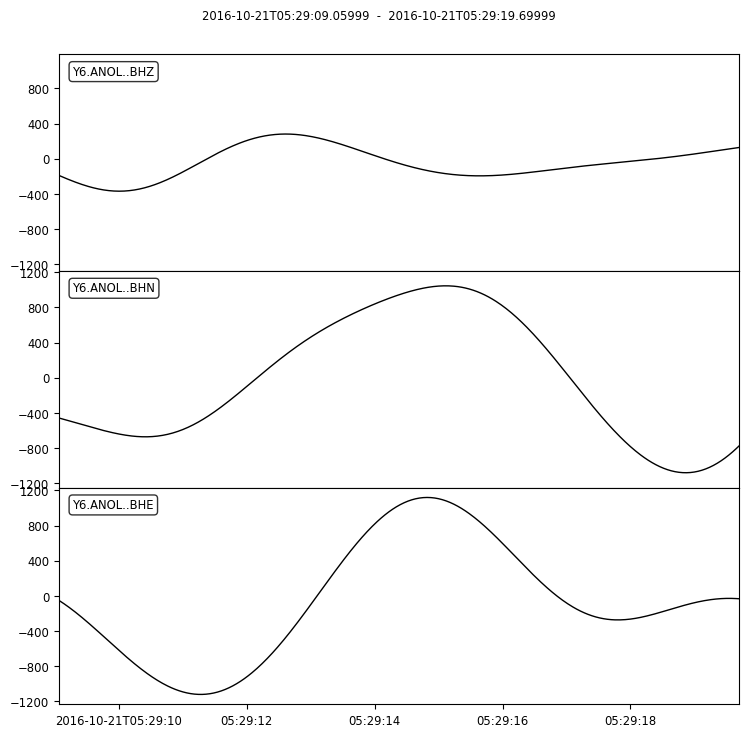

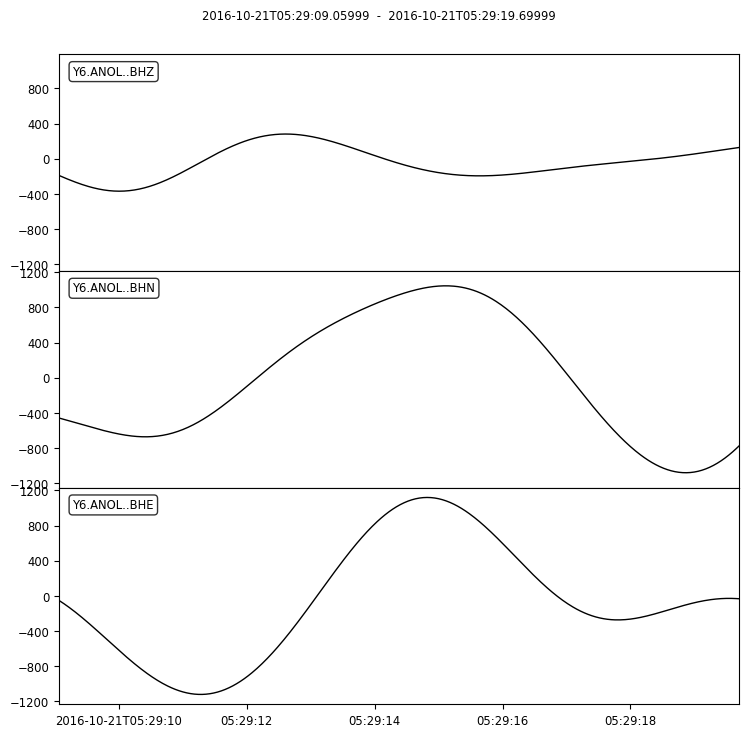

In [54]:
st_wind.plot()

In [64]:
st = obspy.read('/Users/ja17375/Projects/DeepMelt/Ethiopia/data/ANOL/run/ANOL_2016356_0024.BH?')
st_wind = measurement.window_traces(st)
trF, trS = waveform_tools.rotate_traces(st_wind.select(channel='BHN')[0],
                                        st_wind.select(channel='BHE')[0] , -15)

Text(0.5, 0, 'Time [s]')

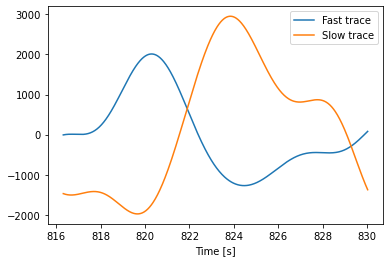

In [65]:
fig, ax = plt.subplots(1)
t = trF.times() + trF.stats.sac['b']
ax.plot(t, trF.data, label='Fast trace')
ax.plot(t, trS.data, label='Slow trace')
ax.legend()
ax.set_xlabel('Time [s]')


In [58]:
st_wind[0]

Y6.ANOL..BHE | 2016-10-21T05:29:09.059990Z - 2016-10-21T05:29:19.699990Z | 50.0 Hz, 533 samples

Make an example synthetic for BSM22 talk:
first where t* = 0  

In [103]:
st1 = synthetics.gen_synthetic_split(30, 1, dtstar=0, spol=60, dfreq=0.1, delta=0.05, noise=0.001)
for tr in st1:
    tr.stats.sac['a']  = -10
    tr.stats.sac['f'] = 11
st1_wind = measurement.window_traces(st1)

dt* = 0


In [110]:
st2 = synthetics.gen_synthetic_split(30, 1, dtstar=0, spol=60, dfreq=0.1, delta=0.05, noise=0.001)
for tr in st2:
    tr.stats.sac['a']  = -10
    tr.stats.sac['f'] = 11
st2_wind = measurement.window_traces(st2)

dt* = 0


Text(0.5, 0, 'Time [s]')

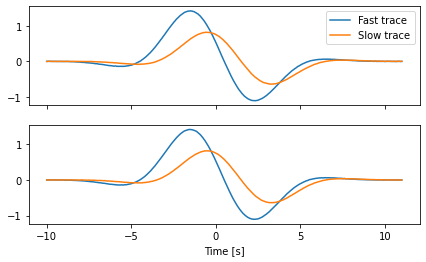

In [111]:
trF1, trS1 = waveform_tools.rotate_traces(st1_wind.select(channel='BHN')[0],
                                        st1_wind.select(channel='BHE')[0] , 30)

trF2, trS2 = waveform_tools.rotate_traces(st2_wind.select(channel='BHN')[0],
                                        st2_wind.select(channel='BHE')[0] , 30)

fig, axs = plt.subplots(2, 1, figsize=(7,4), sharex=True)
t = trF1.times() + trF1.stats.sac['a']
ax0 = axs[0]
ax0.plot(t, trF1.data, label='Fast trace')
ax0.plot(t, trS1.data, label='Slow trace')
ax0.legend()
ax1 = axs[1]
ax1.plot(t, trF2.data, label='Fast trace')
ax1.plot(t, trS2.data, label='Slow trace')
ax1.set_xlabel('Time [s]')

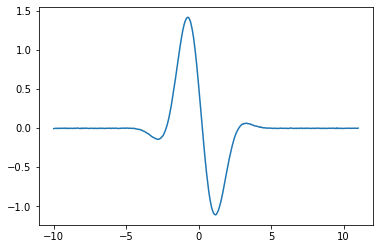

In [101]:
plt.plot(t, trF2.data)